In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
import numpy as np
import pandas as pd
import pickle

from src.sqr.sqr import calculate_sqi

In [6]:
sessions = pd.read_parquet('../data/raw/flex_desarrollo_sesiones.parquet')

In [7]:
sessions.head()

,idSesiones,fechaInicio,fechaFin,idPerfil,idImatt,sqr,lecho,notaUsuario,suenios,idUsuario,...,poco_descanso,notas,imagen_hot,wake,rem,nr_1,nr_2,deep,fechaEntrada,idPerfilPadre
0,20,2017-06-29 01:18:47,2017-06-29 07:51:47,NaN,11.0,40.0493,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
1,21,2017-06-30 01:29:11,2017-06-30 07:53:34,NaN,11.0,27.3639,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
2,22,2017-07-01 01:02:20,2017-07-01 06:15:55,NaN,11.0,40.3763,1.0,NaN,None,3.0,...,NaN,0,None,None,None,None,None,None,NaT,0
3,23,2017-07-01 00:32:46,2017-07-01 08:18:00,NaN,37.0,27.2268,1.0,2.0,None,2.0,...,0.0,0,None,None,None,None,None,None,NaT,0
4,24,2017-07-01 00:32:51,2017-07-01 06:50:36,NaN,37.0,21.9241,2.0,NaN,None,2.0,...,NaN,0,None,None,None,None,None,None,NaT,0


In [10]:
sessions = pd.read_parquet('../data/raw/flex_desarrollo_sesiones.parquet')
movements = pd.read_parquet('../data/raw/flex_desarrollo_movimientos.parquet')

In [45]:
def rename_movement_columns(df):
    old_names = ['fecha', 'presion0', 'presion1', 'presion2', 'presion3', 
                 'presion4', 'presion5', 'presion6', 'presion7', 'presion8',
                 'presion9', 'presion10', 'presion11', 'presion12',
                 'tipoMovimiento']
    new_names = ['timestamp', 'pressure0', 'pressure1', 'pressure2', 
             'pressure3', 'pressure4', 'pressure5', 'pressure6', 
             'pressure7', 'pressure8','pressure9', 'pressure10',
             'pressure11', 'pressure12', 'type']
    
    return df.rename(columns=dict(zip(old_names, new_names)))

In [56]:
movements = rename_movement_columns(movements)

def calculate_new_sqr(session):
    session_movements = movements[movements['idSesion'] == session['idSesiones']]
    return calculate_sqi(session['fechaInicio'], session['fechaInicio'], session_movements)

sessions['sqr'] = sessions.apply(calculate_new_sqr, axis=1)

In [63]:
sessions.to_parquet('../data/processed/sessions_new_sqr.parquet')

In [80]:
sessions.shape

(27365, 25)

In [79]:
sessions['sqr'][sessions['sqr'] < 100].shape

(22439,)

<AxesSubplot:>

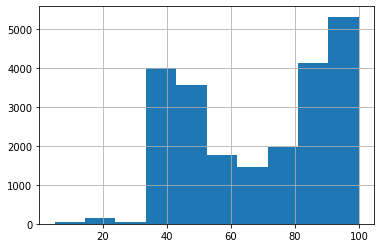

In [81]:
sessions['sqr'][sessions['sqr'] < 100].hist()

In [95]:
sessions_gt_7 = sessions[(sessions['fechaFin'] - sessions['fechaEntrada']) > pd.Timedelta(hours=7)]
sessions_gt_7.shape

(608, 25)

<AxesSubplot:>

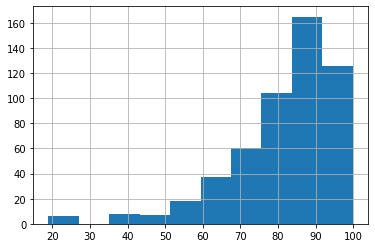

In [96]:
sessions_gt_7['sqr'][sessions_gt_7['sqr'] < 100].hist()